In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
clusters = [[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 150, centers = clusters, cluster_std = 0.60)

In [7]:
ms = MeanShift()
ms.fit(X)
cluster_centers = ms.cluster_centers_

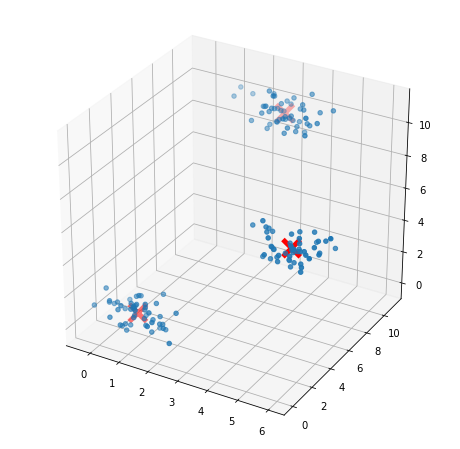

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)
plt.show()

example-2

In [14]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn import preprocessing, model_selection
import pandas as pd
import matplotlib.pyplot as plt


'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''


'\nPclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)\nsurvival Survival (0 = No; 1 = Yes)\nname Name\nsex Sex\nage Age\nsibsp Number of Siblings/Spouses Aboard\nparch Number of Parents/Children Aboard\nticket Ticket Number\nfare Passenger Fare (British pound)\ncabin Cabin\nembarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)\nboat Lifeboat\nbody Body Identification Number\nhome.dest Home/Destination\n'

In [16]:
path= 'https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls'
df = pd.read_excel(path)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [33]:
df.columns.values

array(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'cabin', 'embarked', 'boat'], dtype=object)

In [17]:
original_df = pd.DataFrame.copy(df)
df.drop(['body','name'], 1, inplace=True)
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

In [18]:
df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [19]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_

In [20]:
original_df['cluster_group']=np.nan

In [21]:
for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]

C:\Users\DeLL\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    #print(i,survival_rate)
    survival_rates[i] = survival_rate
    
print(survival_rates)

{0: 0.3688925081433225, 1: 0.6530612244897959, 2: 0.5555555555555556, 3: 1.0, 4: 0.1, 5: 1.0}


In [23]:
print(original_df[ (original_df['cluster_group']==1) ])

      pclass  survived                                               name  \
0          1         1                      Allen, Miss. Elisabeth Walton   
1          1         1                     Allison, Master. Hudson Trevor   
2          1         0                       Allison, Miss. Helen Loraine   
3          1         0               Allison, Mr. Hudson Joshua Creighton   
4          1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
10         1         0                             Astor, Col. John Jacob   
11         1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
24         1         1                                  Bird, Miss. Ellen   
32         1         1                            Bonnell, Miss. Caroline   
54         1         1                Carter, Master. William Thornton II   
55         1         1                          Carter, Miss. Lucile Polk   
56         1         1                         Carter, Mr. William Ernest   

In [24]:
print(original_df[ (original_df['cluster_group']==0) ].describe())

            pclass     survived         age        sibsp        parch  \
count  1228.000000  1228.000000  977.000000  1228.000000  1228.000000   
mean      2.349349     0.368893   29.418884     0.427524     0.289088   
std       0.808033     0.482701   14.212758     0.836489     0.641142   
min       1.000000     0.000000    0.166700     0.000000     0.000000   
25%       2.000000     0.000000   21.000000     0.000000     0.000000   
50%       3.000000     0.000000   28.000000     0.000000     0.000000   
75%       3.000000     1.000000   38.000000     1.000000     0.000000   
max       3.000000     1.000000   80.000000     5.000000     4.000000   

              fare        body  cluster_group  
count  1227.000000  114.000000         1228.0  
mean     23.916894  161.798246            0.0  
std      25.856574   98.697283            0.0  
min       0.000000    1.000000            0.0  
25%       7.895800   70.500000            0.0  
50%      13.000000  165.500000            0.0  
75%   

In [25]:
print(original_df[ (original_df['cluster_group']==2) ].describe())

       pclass   survived        age      sibsp      parch        fare   body  \
count    18.0  18.000000  18.000000  18.000000  18.000000   18.000000    1.0   
mean      1.0   0.555556  49.333333   0.500000   1.555556  205.150689  122.0   
std       0.0   0.511310  11.636656   0.514496   1.247219   62.071681    NaN   
min       1.0   0.000000  24.000000   0.000000   0.000000   83.158300  122.0   
25%       1.0   0.000000  45.000000   0.000000   1.000000  156.313550  122.0   
50%       1.0   1.000000  50.000000   0.500000   1.000000  219.512500  122.0   
75%       1.0   1.000000  58.000000   1.000000   2.000000  262.375000  122.0   
max       1.0   1.000000  64.000000   1.000000   4.000000  263.000000  122.0   

       cluster_group  
count           18.0  
mean             2.0  
std              0.0  
min              2.0  
25%              2.0  
50%              2.0  
75%              2.0  
max              2.0  


In [26]:
cluster_0 = (original_df[ (original_df['cluster_group']==0) ])
cluster_0_fc = (cluster_0[ (cluster_0['pclass']==1) ])
print(cluster_0_fc.describe())

       pclass    survived         age       sibsp       parch        fare  \
count   261.0  261.000000  224.000000  261.000000  261.000000  261.000000   
mean      1.0    0.590038   39.917411    0.356322    0.180077   57.907790   
std       0.0    0.492771   13.902644    0.518363    0.449514   34.874092   
min       1.0    0.000000    4.000000    0.000000    0.000000    0.000000   
25%       1.0    0.000000   29.750000    0.000000    0.000000   29.700000   
50%       1.0    1.000000   39.000000    0.000000    0.000000   52.554200   
75%       1.0    1.000000   50.000000    1.000000    0.000000   78.850000   
max       1.0    1.000000   80.000000    2.000000    2.000000  227.525000   

             body  cluster_group  
count   31.000000          261.0  
mean   168.451613            0.0  
std     86.191971            0.0  
min     16.000000            0.0  
25%    109.500000            0.0  
50%    172.000000            0.0  
75%    239.500000            0.0  
max    307.000000         